<a href="https://colab.research.google.com/github/Amar8769/Quantum-Computing/blob/main/GroversAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit qiskit-aer pylatexenc


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=56aa295bb615dd7beae57fcd7d19f180031164238a6ae1e367bb6ab11df62e2f
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.circuit.library import MCMTGate, XGate
from matplotlib import pyplot as plt
import numpy as np


In [3]:
def buildDiffuser(qubit_number, QC_040):
    QC_040.h(range(qubit_number))
    QC_040.x(range(qubit_number))

    QC_040.h(qubit_number - 1)
    QC_040.append(MCMTGate(XGate(), qubit_number - 1, 1, ctrl_state="1" * (qubit_number - 1)),
              range(qubit_number))
    QC_040.h(qubit_number - 1)

    QC_040.x(range(qubit_number))
    QC_040.h(range(qubit_number))

    return QC_040


In [4]:
def buildCircuit(qubit_number, patterns):
    QC_040 = QuantumCircuit(qubit_number + 1, qubit_number + 1)
    QC_040.h(range(qubit_number))
    QC_040.barrier()
    for pattern in patterns:
        oracle = MCMTGate(XGate(), qubit_number, 1, ctrl_state=pattern[::-1])
        QC_040.append(oracle, range(qubit_number + 1))
    QC_040.barrier()
    buildDiffuser(qubit_number, QC_040)

    return QC_040


In [5]:
def buildCircuit(qubit_number, patterns):
    """Builds the main Grover circuit using the oracle and diffuser."""
    QC_040 = QuantumCircuit(qubit_number + 1, qubit_number + 1)

    # Initialization: create superposition
    QC_040.h(range(qubit_number))
    QC_040.barrier()

    # Oracle: mark the target state(s)
    for pattern in patterns:
        oracle = MCMTGate(XGate(), qubit_number, 1, ctrl_state=pattern[::-1])
        QC_040.append(oracle, range(qubit_number + 1))
    QC_040.barrier()

    # Diffuser
    buildDiffuser(qubit_number, QC_040)

    return QC_040


In [8]:
qubit_number = int(input("Enter number of qubits: "))
states = int(input("Enter the number of states to search for: "))

patterns = []
for i in range(states):
    while True:
        pattern = input(f"Enter pattern {i + 1}: ")
        if len(pattern) == qubit_number and pattern.isdigit() and all(c in "01" for c in pattern):
            patterns.append(pattern)
            break
        else:
            print("Invalid pattern. Try again!")


Enter number of qubits: 3
Enter the number of states to search for: 1
Enter pattern 1: 110


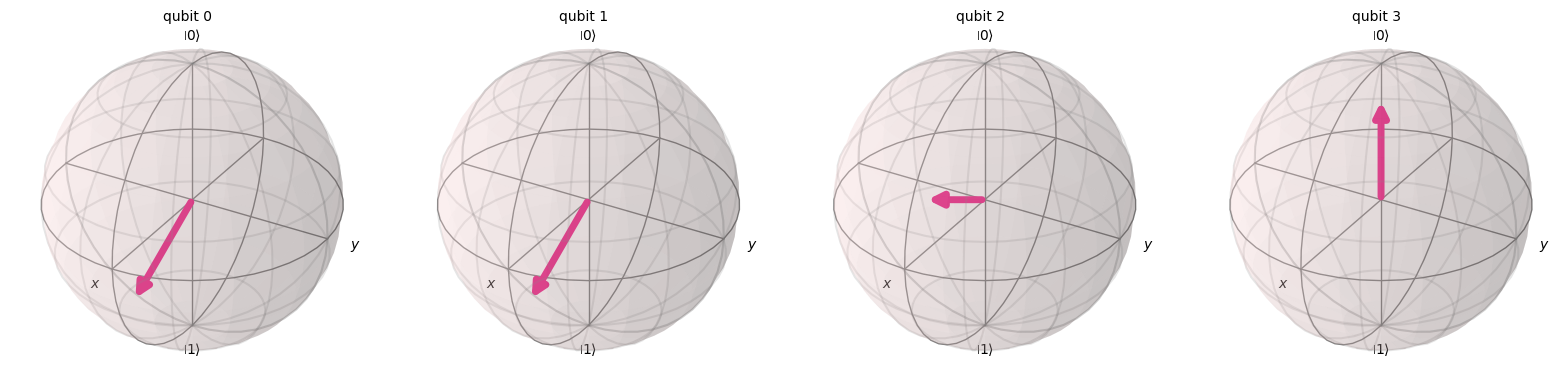

In [9]:
QC_040 = buildCircuit(qubit_number, patterns)
State = Statevector(QC_040)
plot_bloch_multivector(State)



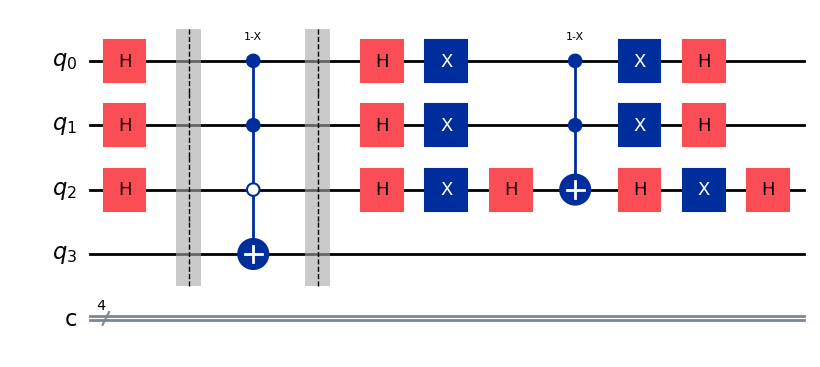

In [10]:
QC_040.draw('mpl')

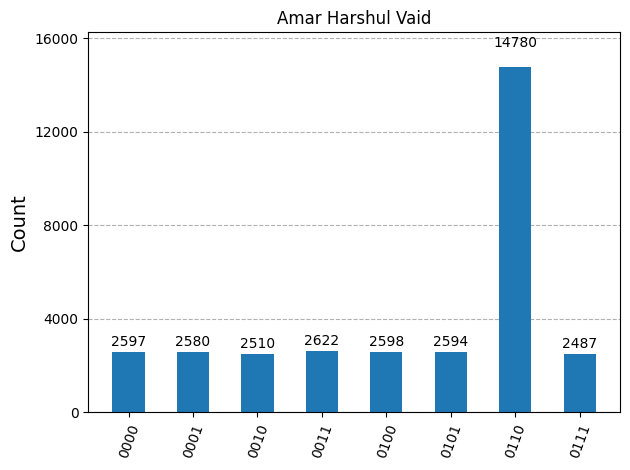

In [11]:
QC_040.measure(range(qubit_number), range(qubit_number-1,-1,-1))
Backend = AerSimulator()
QCT = transpile(QC_040, Backend)
Job = Backend.run(QCT, shots = 1024 * 32)
Counts = Job.result().get_counts()
plot_histogram(Counts, title="Amar Harshul Vaid")